In [1]:
import pandas as pd
import sys
sys.path.append('../src')
from database import get_last_data, get_collection
import os
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [2]:
SCRAPPER = os.getenv("COLLECTION_SCRAPPER")

In [3]:
df = pd.DataFrame(get_last_data(collection=SCRAPPER))
df.head()

,_id,title,link,summary,tags,author,date
0,6892227ba3ec14eb54d96c6b,How to reclaim horizontal space made available...,https://stackoverflow.com/questions/79726327/h...,I have a row of subplots which start with a hi...,"[python, matplotlib, whitespace, subplot]",sds,2025-08-05 15:22:19Z
1,68922388ae7bb4e6cf701369,Why presenting ActivityView created from UIVie...,https://stackoverflow.com/questions/79726331/w...,I am using the following library to create scr...,"[swiftui, screenshot, uiviewrepresentable]",Bartłomiej Semańczyk,2025-08-05 15:27:01Z
2,68922388ae7bb4e6cf70136b,Compile-time manipulation of std::source_locat...,https://stackoverflow.com/questions/79726322/c...,I want to write a function that can obtain cal...,"[c++, constexpr, consteval, std-source-location]",GKxx,2025-08-05 15:13:16Z
3,68922388ae7bb4e6cf70136c,Expo TaskManager not executing on scheduled no...,https://stackoverflow.com/questions/79726321/e...,I'm building a sunrise alarm clock app in Reac...,"[, android, react-native, expo, notifications,...",user27776453,2025-08-05 15:11:38Z
4,68922388ae7bb4e6cf70136d,OAS Generator creates classes even for referen...,https://stackoverflow.com/questions/79726312/o...,I have two yml files\nCommon.yml and applicati...,"[java, yaml, swagger, oas]",JayakumarSivasankar,2025-08-05 15:01:00Z


In [4]:
df.shape


(478, 7)

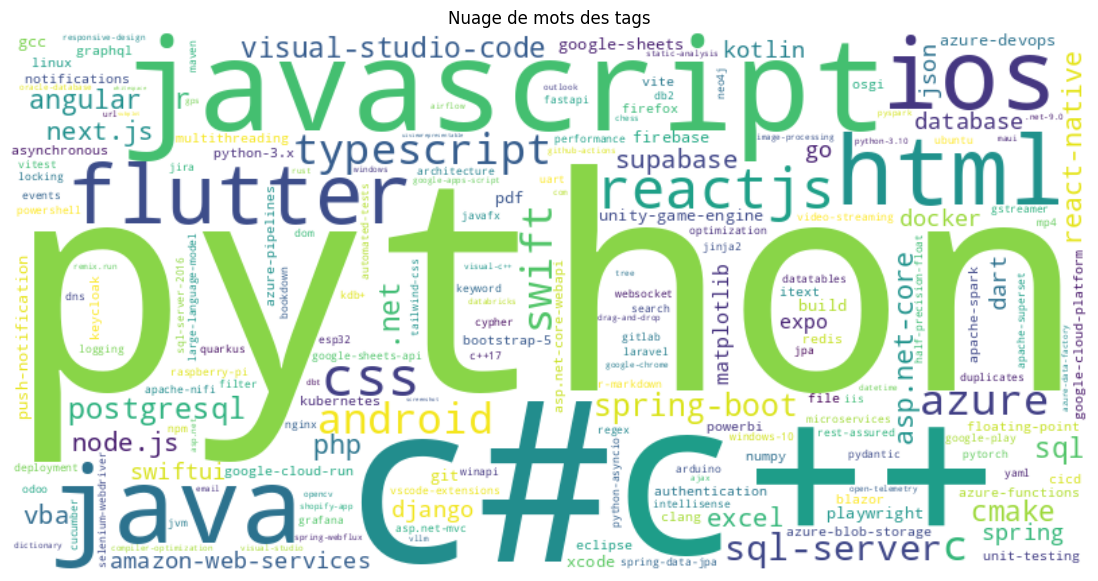

In [ ]:
all_tags = [tag for tags_list in df['tags'] for tag in tags_list]

from collections import Counter
tag_counts = Counter(all_tags)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(tag_counts)

plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Nuage de mots des tags")
plt.show()

In [ ]:
tag_counts.most_common()


[('', 85),
 ('python', 52),
 ('c#', 26),
 ('c++', 25),
 ('javascript', 23),
 ('java', 21),
 ('ios', 18),
 ('html', 17),
 ('flutter', 17),
 ('reactjs', 15),
 ('css', 14),
 ('typescript', 11),
 ('c', 11),
 ('azure', 11),
 ('swift', 11),
 ('android', 10),
 ('sql-server', 10),
 ('spring-boot', 10),
 ('postgresql', 9),
 ('r', 8),
 ('visual-studio-code', 8),
 ('sql', 8),
 ('.net', 8),
 ('cmake', 8),
 ('react-native', 7),
 ('asp.net-core', 7),
 ('php', 7),
 ('angular', 7),
 ('next.js', 6),
 ('excel', 6),
 ('node.js', 6),
 ('supabase', 6),
 ('vba', 6),
 ('swiftui', 5),
 ('docker', 5),
 ('amazon-web-services', 5),
 ('django', 5),
 ('database', 5),
 ('kotlin', 5),
 ('json', 5),
 ('dart', 5),
 ('go', 5),
 ('spring', 5),
 ('matplotlib', 4),
 ('expo', 4),
 ('unity-game-engine', 4),
 ('google-sheets', 4),
 ('azure-devops', 4),
 ('xcode', 4),
 ('push-notification', 4),
 ('git', 4),
 ('playwright', 4),
 ('pdf', 4),
 ('gcc', 4),
 ('build', 4),
 ('firebase', 4),
 ('notifications', 3),
 ('azure-functions